# 광주 인공지능 사관학교
- - -
- 작성자 : 2반 한지호
- 작성일 : 20.07.20 수
- 5교시 머신러닝 시간에 사용한 KNN 교안 및 실습 파일

# 지도학습 - K-Nearest Neighbors (KNN)

지도 학습 (Supervised Learning)
- 데이터에 대한 Label(명시적인 답)이 주어진 상태에서 컴퓨터를 학습시키는 방법. 

비지도 학습 (Unsupervised Learning)
- 데이터에 대한 Label(명시적인 답)이 없는 상태에서 컴퓨터를 학습시키는 방법.
- 데이터의 숨겨진 특성이나 구조를 파악하는데 사용.


분류 (Classification)
- 미리 정의된 여러 클래스 레이블 중 하나를 예측하는 것.
- 속성 값을 입력, 클래스 값을 출력으로 하는 모델
- 붓꽃(iris)의 세 품종 중 하나로 분류, 암 분류 등. 
- 이진분류, 다중 분류 등이 있다.


회귀 (Regression)
- 연속적인 숫자를 예측하는 것.
- 속성 값을 입력, 연속적인 실수 값을 출력으로 하는 모델
- 어떤 사람의 교육수준, 나이, 주거지를 바탕으로 연간 소득 예측. 
- 예측 값의 미묘한 차이가 크게 중요하지 않다.

일반화, 과대적합, 과소적합

일반화 (Generalization)
- 모델이 처음보는 데이터에 대해 정확하게 예측할 수 있는 것.
- 훈련 세트로 학습한 모델이 테스트 세트에 대해 정확히 예측 하도록 하는 것.

과대적합 (Overfitting)
- 훈련 세트에 너무 맞추어져 있어 테스트 세트의 성능 저하.

과소적합 (Underfitting)
- 훈련 세트를 충분히 반영하지 못해 훈련 세트, 테스트 세트에서 모두 성능이 저하.


***일반화 성능이 최대화 되는 모델을 찾는 것이 목표***

과대적합 (Overfitting)
- 모델이 훈련 세트의 각 샘플에 너무 가깝게 맞춰져서 새로운 데이터에 일반화되기 어려울 때.
- 가진 정보를 모두 사용해서 너무 복잡한 모델을 만드는 것.

과소적합 (Underfitting)
- 모델링을 너무 간단하게 하여 성능이 제대로 나오지 않을 때.
- 데이터의 다양성을 잡아내지 못하고, 훈련 세트에도 잘 맞지 않는 너무 간단한 모델을 만드는 것.


해결방법

- 주어진 훈련데이터의 다양성이 보장되어야 한다 (다양한 데이터 포인트를 골고루 나타내야 한다)
- 일반적으로 데이터 양이 많으면 일반화에 도움이 된다.
- 그러나 편중된 데이터를 많이 모으는 것은 도움이 되지 않는다.
- 규제([Regularization](https://developers.google.com/machine-learning/glossary#L1_regularization))을 통해 모델의 복잡도를 적정선으로 설정한다.


## K-Nearest Neighbors (KNN)


k-최근접 이웃 알고리즘

- 새로운 데이터 포인트와 가장 가까운 훈련 데이터세트의 데이터 포인트를 찾아 예측
- k 값에 따라 가까운 이웃의 수가 결정
- 분류와 회귀에 모두 사용 가능


- 입력 값과 k개의 가까운 점이 있다고 가정할 때 그 점들이 어떤 라벨과 가장 비슷한지 (최근접 이웃)
판단하는 알고리즘

- 매개 변수 : 데이터 포인트 사이의 거리를 재는 방법 (일반적으로 유클리디안 거리를 이용), 이웃의 수
 - 장점 : 이해하기 쉬운 모델, 약간의 조정으로 좋은 성능
 - 단점 : 훈련 세트가 크면 속도가 느림, 많은 특성을 처리하기 힘듬.

In [1]:
# mglearn 라이브러리 설치
!pip install mglearn

In [2]:
# Windows 한글 설정
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

C:\Users\James\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\James\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\James\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


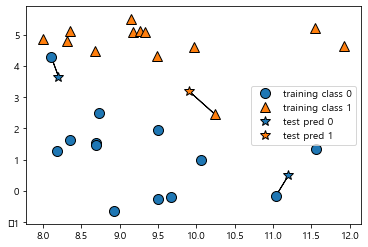

In [3]:
import mglearn

mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\Users\James\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\James\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\James\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


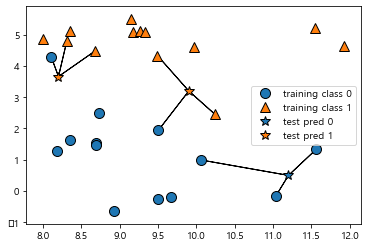

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

- k 값이 작을 수록 모델의 복잡도가 상대적으로 증가. (이웃을 적게 사용하면)
- 반대로 k 값이 커질수록 모델의 복잡도가 낮아진다. (이웃을 많이 사용하면)
- 100개의 데이터를 학습하고, k를 100개로 설정하여 예측하면 빈도가 가장 많은 클래스 레이블로 분류
 (훈련 데이터 전체 개수를 이웃의 수로 지정하는 극단적인 경우)
 
 [KNeighborsClassifier 분석](ml_02_%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_KNN.ipynb#KNeighborsClassifier-%EB%B6%84%EC%84%9D) 참고


유클리디안 거리 (Euclidean distance) : 두 점사이의 거리를 계산할 때 쓰이는 방법
- 두 점 (p1, p2, ...)와 (q1, q2, ....)의 거리

<center>
 <img src="https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F242971445236215901" alt="유클리디안 거리 공식" width="60%" />

유클리디안 거리 공식

</center>

KNeighborsClassifier()
```
KNeighborsClassifier(n_neighbors, weights, algorithm, leaf_size, p, metric, metric_params, n_jobs)
```
- n_neighbors : 이웃의 수 (default : 5)
- weights : 예측에 사용된 가중 함수 (uniform, distance) (default : uniform)
- algorithm : 가까운 이웃을 계산하는데 사용되는 알고리즘 (auto, ball_tree, kd_tree, brute)
- leaf_size : BallTree 또는 KDTree에 전달 된 리프 크기
- p : (1 : minkowski_distance, 2: manhattan_distance 및 euclidean_distance)
- metric : 트리에 사용하는 거리 메트릭스
- metric_params : 메트릭 함수에 대한 추가 키워드 인수
- n_jobs : 이웃 검색을 위해 실행할 병렬 작업 수

KNeighborsClassifier 모델은 k-최근접 이웃 분류 또는 KNN이라고 합니다. <br>
k-NN 알고리즘은 가장 가까운 훈련 데이터 포인트 K개를 최근접 이웃으로 찾아 예측에 사용합니다. <br>
n_neighbors=1 는 1개를 최근접 이웃으로 하겠다는 것입니다.

주요 매개변수(Hyperparameter)
- 거리측정 방법, 이웃의 수, 가중치 함수 

scikit-learn의 경우
- metric  :  유클리디언 거리 방식
- k : 이웃의 수
- weight  : 가중치 함수
     -  uniform : 가중치를 동등하게 설정.
     -  distance :  가중치를 거리에 반비례하도록 설정


장단점
- 이해하기 매우 쉬운 모델
- 훈련 데이터 세트가 크면(특성,샘플의 수) 예측이 느려진다
- 수백 개 이상의 많은 특성을 가진 데이터 세트와 특성 값 대부분이 0인 희소(sparse)한 데이터 세트에는 잘 동작하지 않는다
- 거리를 측정하기 때문에 같은 scale을 같도록 정규화 필요


#### iris 데이터를 이용한 KNN 분류 실습

붓꽃 데이터 셋
- 클래스 (class) : 출력될 수 있는 값 (붓꽃의 종류)
- 레이블 (label) : 특정 데이터 포인트에 대한 출력


붓꽃 (Iris)의 품종 분류

<center>
 <img src="https://thegoodpython.com/assets/images/iris-species.png" alt="붓꽃 품종" width="60%" />

</center>

##### 사이킷 런 이용

In [5]:
# 데이터 가져오기
from sklearn.datasets import load_iris

iris_dataset = load_iris()
iris_dataset
type(iris_dataset)  # sklearn.utils.Bunch -> 파이썬의 딕셔너리와 유사한 키와 값으로 구성

iris_dataset.keys() # 'data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'
# print( iris_dataset['DESCR'] )  # 데이터셋 간략 설명
print( iris_dataset.target_names ) # 예측하려는 붓꽃 품종 이름 리스트
print( iris_dataset.feature_names) # 각 특성을 설명하는 문자열 리스트
print( iris_dataset.data.shape )   # 꽃잎의 길이와 폭, 꽃받침의 길이와 폭 값을 갖는 ndarray
                                   # 머신러닝에서 각 아이템은 샘플, 속성은 특성
print( iris_dataset.data[:5] )     # 처음 5개만 출력
print( iris_dataset.target.shape ) # 샘플 붓꽃의 품종을 담은 ndarray, 1차원 배열
print( iris_dataset.target )       # 붓꽃 종류 0~2 정수로 기록 (0은 setosa)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


##### seaborn 이용



In [6]:
# 데이터 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# iris data loading
iris = sns.load_dataset('iris')
iris.shape

(150, 5)

In [7]:
# 데이터 확인
# sepal_length, sepal_width, petal_length, petal_width, species
# 꽃받침 길이, 꽃받침 넓이, 꽃잎 길이, 꽃잎 넓이, 품종
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


훈련 세트(training set) <br>
테스트 세트(test set), 홀드아웃 세트(hold-out set)

In [8]:
X = iris.iloc[:,:4]  # data
y = iris.iloc[:,-1]  # label

In [9]:
# 훈련 데이터와 테스트 데이터 준비
from sklearn.model_selection import train_test_split

# 2차원 배열(행렬)의 수학 표기방식 대문자 X
# 1차원 배열(벡터)의 수학 표기방식 소문자 y
X_train, X_test, y_train, y_test = train_test_split(
                                      X,
                                      y,
                                      random_state=0 )  # 데이터 섞음

# 75% : 25%
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

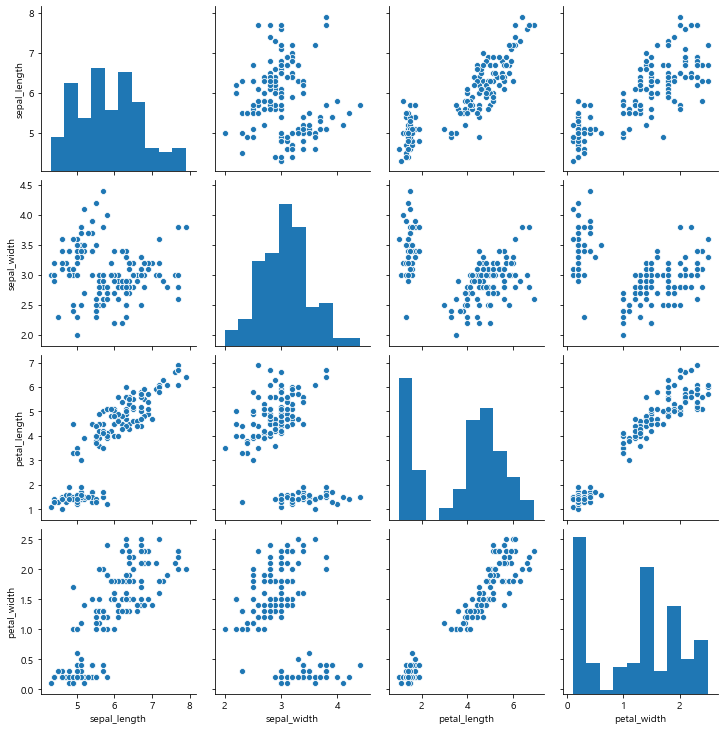

In [10]:
# 데이터 조사
# 산점도 행렬 : 3개 이상의 특성을 표현
# 4개의 특성을 갖는 붓꽃
sns.pairplot(iris, 
             diag_kind='hist') # 대각원소 자리에 각 변수별 히스토그램
plt.show()

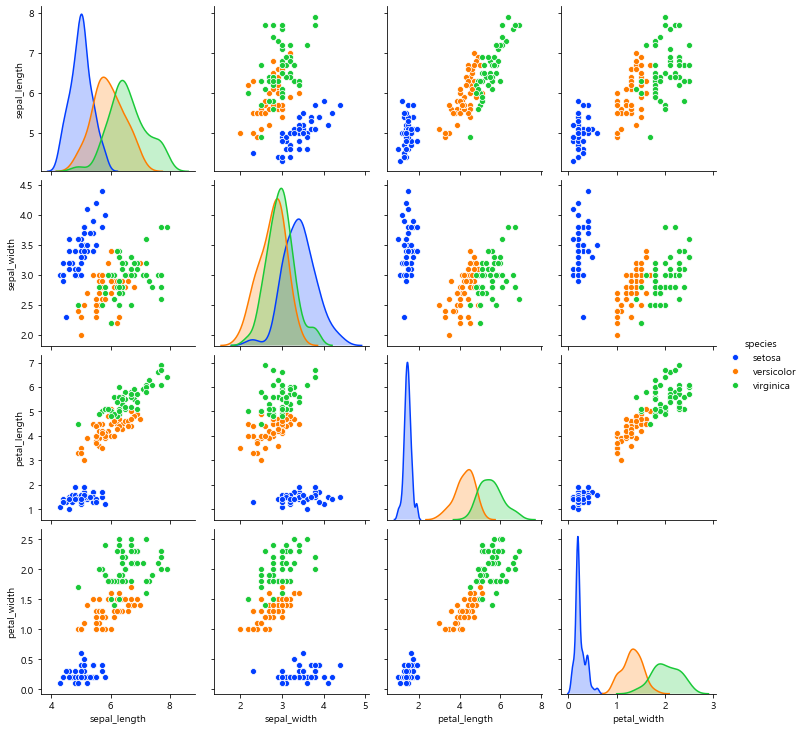

In [11]:
# 대각원소 자리 kde, 종 별로 색을 다르게
sns.pairplot(iris, 
             diag_kind='kde',  # 각 변수별 커널밀도추정곡선
             hue="species",    # 'species' 종(setosa, versicolor, virginica) 별로 색깔을 다르게 표시
             palette='bright') # pastel, bright, deep, muted, colorblind, dark
plt.show()

##### 공통

In [12]:
# 머신러닝 모델
# k-최근접 이웃 알고리즘
# 훈련 데이터에서 새로운 데이터 포인트에 가장 가까운 'k개'의 이웃을 찾는다.
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [13]:
# 예측하기
import numpy as np

X_new = [[5, 2.9, 1, 0.2]]
X_new = np.array( [[5, 2.9, 1, 0.2]] )
X_new.shape

pre = model.predict(X_new)
print("예측:", pre)

예측: ['setosa']


In [14]:
# 모델 평가
# 테스트 세트 이용
from sklearn import metrics

pred = model.predict(X_test)

ac_score = metrics.accuracy_score(y_test, pred)
print("정답률 =", ac_score)

정답률 = 0.9736842105263158


##### iris 데이터를 이용한 KNN 분류 실습 전체코드


In [15]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# 데이터 가져오기
# iris data loading
iris = sns.load_dataset('iris')
iris.shape

# 훈련 데이터와 테스트 데이터 준비
# 75% : 25%
X_train, X_test, y_train, y_test = train_test_split(
                                      iris.iloc[:,:4],
                                      iris.iloc[:,-1],
                                      random_state=0 )  # 데이터 섞음

# 모델 선택과 학습
# k-최근접 이웃 알고리즘
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
ac_score = metrics.accuracy_score(y_test, pred)
print("정답률 =", ac_score)

# 예측활용
X_new = [[5, 2.9, 1, 0.2]]
pre = model.predict(X_new)
print("예측:", pre)

정답률 = 0.9736842105263158
예측: ['setosa']


### KNeighborsClassifier 분석

#### 결정경계([descision boundary](https://developers.google.com/machine-learning/glossary#%EA%B2%B0%EC%A0%95-%EA%B2%BD%EA%B3%84decision-boundary))

이웃의 수를 늘릴수록 결정경계는 더 부드러워진다.

이웃을 적게 사용하면 모델의 복잡도가 높아지고, 
많이 사용하면 복잡도는 낮아진다.

In [16]:
from sklearn.datasets import make_blobs

def make_forge():
    X, y = make_blobs(centers=2, random_state=4, n_samples=30)
    y[np.array([7, 27])] = 0
    mask = np.ones(len(X), dtype=np.bool)
    mask[np.array([0, 1, 5, 26])] = 0
    X, y = X[mask], y[mask]
    return X, y

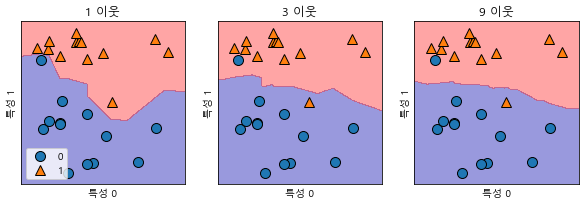

In [17]:
# KNeighborsClassifier 분석
import mglearn
import matplotlib.pyplot as plt

X, y = make_forge()
X_train, X_test, y_train, y_test = train_test_split(
                                      X,
                                      y,
                                      random_state=0 ) 

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메서드는 self 객체를 반환
    # 그래서 객체 생성과 fit 메서드를 한 줄에 쓸 수 있다.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, 
                                    ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

#### 모델 복잡도와 일반화 사이의 관계

이웃의 수 변화에 따른 훈련 세트와 테스트 세트의 성능 변화

- 데이터셋 : wisconsin의 유방암 데이터셋
- 총 569건의 데이터로 악성(212), 양성 (357)으로 구성

<center>
 <img src="https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile7.uf.tistory.com%2Fimage%2F99306C335A1685AA111704" alt="wisconsin의 유방암 데이터셋" width="30%" />

</center>

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer.keys()
cancer.data.shape  # 데이터와 특성 수

(569, 30)

In [19]:
import numpy as np

# 양성과 악성 데이터의 수
# zip() : 2개의 데이터를 연결
# bincount() : 클래스별 개수를 반환
for n, v in zip(cancer.target_names, np.bincount(cancer.target)):
    print({n:v})

{'malignant': 212}
{'benign': 357}


In [20]:
# 특성의 명칭
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [21]:
# 훈련 데이터와 테스트 데이터 분리
# stratify: default=None 입니다. classification을 다룰 때 매우 중요한 옵션값입니다. 
# stratify 값을 target으로 지정해주면 
# 각각의 class 비율(ratio)을 train / validation에 유지해 줍니다. 
# (한 쪽에 쏠려서 분배되는 것을 방지합니다) 만약 이 옵션을 지정해 주지 않고
#  classification 문제를 다룬다면, 성능의 차이가 많이 날 수 있습니다.
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify=cancer.target,
                                                    random_state=66)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


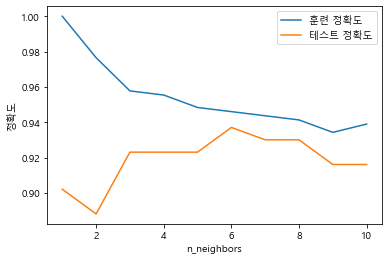

In [22]:
training_accuracy = []
test_accuracy = []
# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    
    model = KNeighborsClassifier(n_neighbors=n_neighbors)  # 모델 생성
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train, y_train)) # 훈련 세트 정확도 저장
    test_accuracy.append(model.score(X_test, y_test)) # 테스트 정확도 저장

plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

과대적합과 과소적합의 특징을 발견 (이웃의 수가 적을수록 모델이 복잡해지므로 그래프가 수평으로 뒤집힌 형태가 나타남) <br>
이웃의 수가 하나일 때 훈련 데이터에 대한 예측이 완벽하나, 이웃의 수가 늘어나면 모델은 단순해지고 훈련 데이터의 정확도는 줄어든다.

정확도가 가장 좋을 때는? -> 중간정도인 6개를 사용했을 경우

### K-NN 회귀

k-NN을 회귀에 사용한 경우
- 여러 개의 최근접 이웃을 사용할 경우에는 이웃 간의 평균이 예측 <br> (분류에서는 이웃의 레이블 개수를 확인해서 다수결로 정했지만, 회귀에서는 이웃들의 평균을 계산한다는 점이 차이)

- 분류는 모델과 비교하여 유사한 데이터의 개수(불연속)로 판단한다면 회귀는 데이터의 평균유사도 (연속적인)와 같은 수치로 판단

Classification(분류)는 연속적이지 않은 레이블, 다시 말해 ‘무엇’인지를 예측하지만, 회귀(Regression)는 연속된 수치, 즉 ‘얼마나’를 예측

C:\Users\James\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\James\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


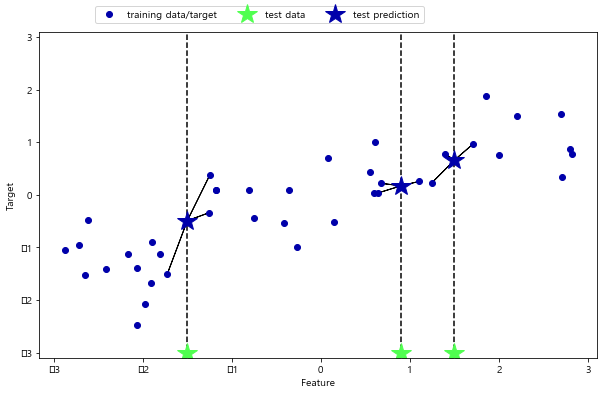

In [23]:
import mglearn
import matplotlib.pyplot as plt

# n_neighbors 값을 변경하면 이웃간의 평균에 따라 위치가 위/아래로 변화
mglearn.plots.plot_knn_regression(n_neighbors=3)

# 이웃이 여러개일 경우 이웃간의 평균이 예측
# KNeightborsRegressor의 weights 매개변수가 기본값 'uniform'일 때는 np.mean으로 단순평균을 계산
# , 'distance'일 때는 거리를 고려한 가중치 평균(average)을 계산하여 사용.

KNeighborsRegressor()

In [24]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=9)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다. 
# 단순한 평균을 적용('uniform')
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

# 테스트 세트에 대해 예측을 합니다.
print("테스트 세트 예측:\n{}".format(reg.predict(X_test)))
type(X_train)
X

테스트 세트 예측:
[-0.04382817 -0.04382817 -0.04382817]


array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816],
       [-2.06403288],
       [-2.65149833],
       [ 2.19705687],
       [ 0.60669007]])

#### K-NN 회귀 실습 01

IMDb 영화 데이터 세트

회귀에 대한 이야기니까 당연히 "평이 좋다" vs "평이 나쁘다" 레이블로 분류하는 게 아니라 <br>
실제 IMDb 등급(별점)을 예측하는 게 과제의 목표

In [25]:
from sklearn.neighbors import KNeighborsRegressor

# 영화에 대한 3개의 특성
X_train = [
  [0.5, 0.2, 0.1],
  [0.9, 0.7, 0.3],
  [0.4, 0.5, 0.7]
]
# 영화에 대한 별점
y_train = [5.0, 6.8, 9.0]

model = KNeighborsRegressor(n_neighbors=3, weights="distance") # 가중 평균을 적용
model.fit(X_train, y_train)

# 새로운 영화 3건에 대해 별점을 예측
X_test = [
  [0.2, 0.1, 0.7],
  [0.4, 0.7, 0.6],
  [0.5, 0.8, 0.1]
]
pre = model.predict(X_test)
pre

array([7.28143288, 7.76451922, 6.8457845 ])